

#**PROJECT**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('dmdw.csv')
df

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

# **Data Preprocessing**

In [ ]:
df.shape

(303, 14)

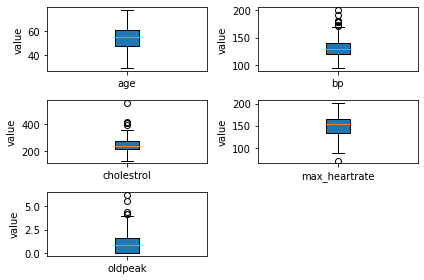

In [ ]:
import matplotlib.pyplot as plt
df_1 = df[["age", "bp", "cholestrol", "max_heartrate", "oldpeak"]]
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

In [ ]:
df.isna().sum()

age              0
sex              0
chest_pain       0
bp               0
cholestrol       0
diabetic         0
restecg          0
max_heartrate    0
ex_ang           0
oldpeak          0
slope            0
ca               0
thal             0
target           0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,chest_pain,bp,cholestrol,diabetic,restecg,max_heartrate,ex_ang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [ ]:
df.sex.unique()

array([1, 0])

In [ ]:
df.ca.unique()

array([0, 2, 1, 3, 4])

In [ ]:
df["ca"]=df["ca"].replace({4:0})

In [ ]:
df.ca.unique()

array([0, 2, 1, 3])

In [ ]:
df.ca.max()

3

# **Exploaratory Data Analysis**

In [ ]:
import seaborn as sns

In [ ]:
custom_palette = ['#FA8072','skyblue','#F2F984']
sns.set_palette(custom_palette)

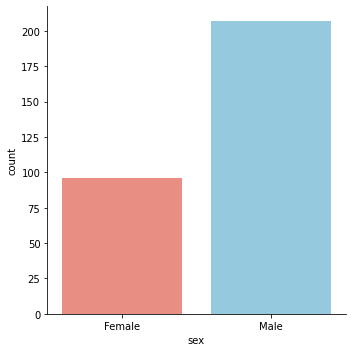

In [ ]:
sns.catplot(x='sex',kind='count',data=df, legend=False).set_xticklabels(["Female", "Male" ])
plt.show()

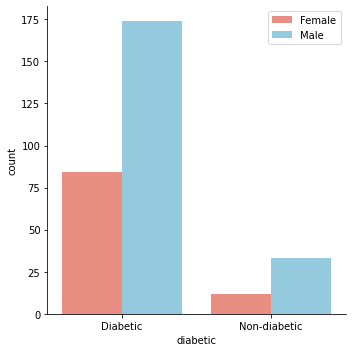

In [ ]:
sns.catplot(x='diabetic',kind='count', data=df, hue='sex', legend=False).set_xticklabels(["Diabetic", "Non-diabetic" ])
plt.legend(labels=['Female','Male'])
plt.show()

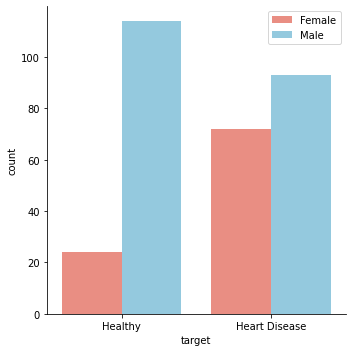

In [ ]:
sns.catplot(x='target',kind='count',data=df, hue='sex', legend=False).set_xticklabels(["Healthy", "Heart Disease" ])
plt.legend(labels=['Female','Male'])
plt.show()

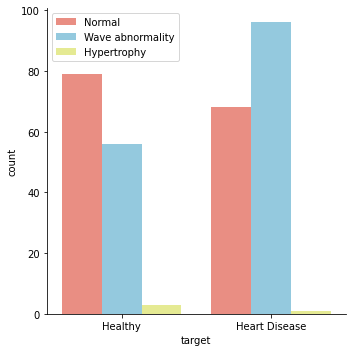

In [ ]:
sns.catplot(x='target',kind='count',data=df, hue='restecg', legend=False).set_xticklabels(["Healthy", "Heart Disease" ])
plt.legend(labels=['Normal','Wave abnormality','Hypertrophy'])
plt.show()

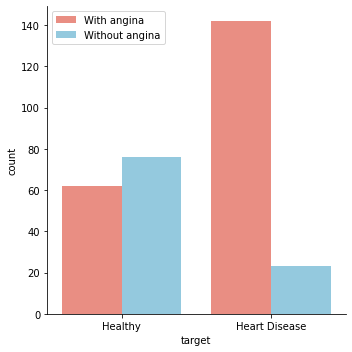

In [ ]:
sns.catplot(x='target',kind='count',data=df, hue='ex_ang', legend=False).set_xticklabels(["Healthy", "Heart Disease" ])
plt.legend(labels=['With angina','Without angina'])
plt.show()

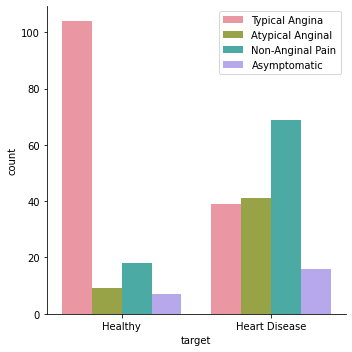

In [ ]:
sns.catplot(x='target',kind='count',data=df, hue='chest_pain', legend=False).set_xticklabels(["Healthy", "Heart Disease" ])
plt.legend(labels=['Typical Angina','Atypical Anginal','Non-Anginal Pain','Asymptomatic'])
plt.show()

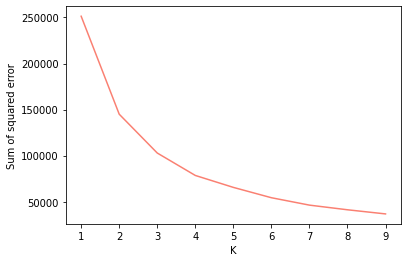

In [ ]:
cdf =df[['bp','max_heartrate']]
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(cdf[['bp','max_heartrate']])
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

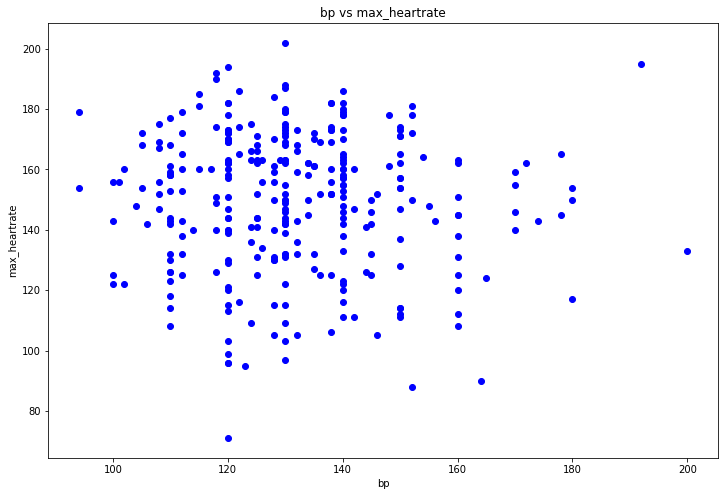

In [ ]:
plt.figure(figsize=(12,8))
plt.title("bp vs max_heartrate")
plt.scatter(cdf["bp"], cdf["max_heartrate"], color = "blue")
plt.xlabel("bp")
plt.ylabel("max_heartrate")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(cdf[['bp','max_heartrate']])
cdf['cluster'] = y_predicted
df1 = cdf[cdf.cluster==0]
df2 = cdf[cdf.cluster==1]
df3 = cdf[cdf.cluster==2]

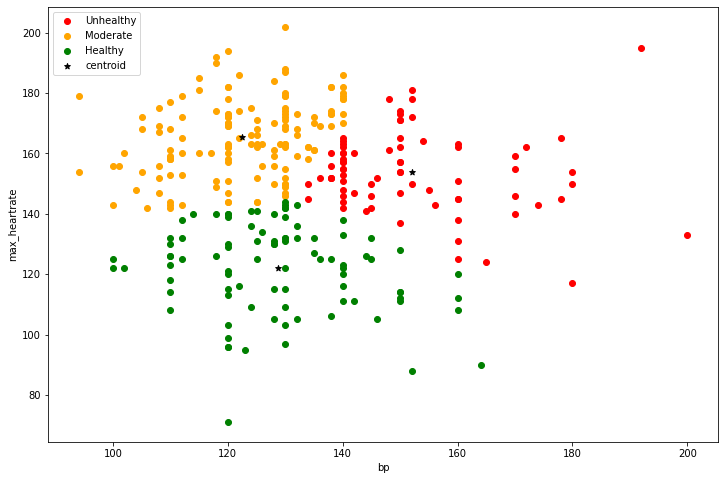

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df1['bp'],df1['max_heartrate'],color='red',label='Unhealthy')
plt.scatter(df2['bp'],df2['max_heartrate'],color='orange',label='Moderate')
plt.scatter(df3['bp'],df3['max_heartrate'],color='green',label='Healthy')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker='*'
,label = 'centroid')
plt.xlabel('bp')
plt.ylabel('max_heartrate')
plt.legend()
plt.show()

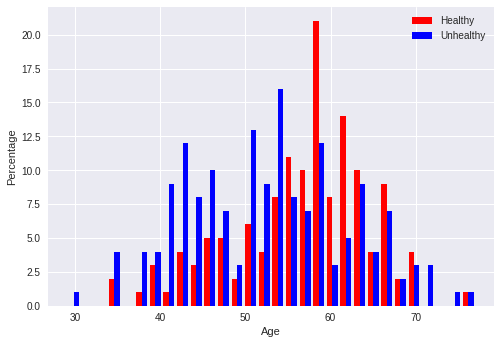

In [ ]:
plt.hist([df[df.target==0].age,df[df.target==1].age],bins=30,alpha=1,label=["Healthy","Unhealthy"],color = ['red','blue'], lw=0);
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend()
plt.show()

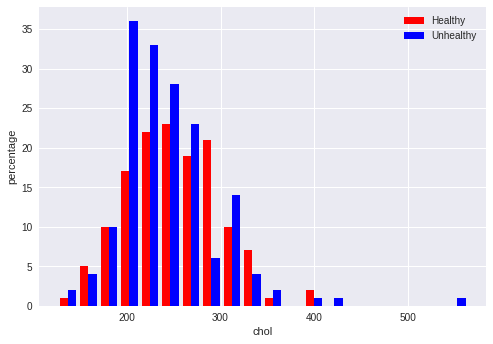

In [ ]:
plt.hist([df[df.target==0].cholestrol, df[df.target==1].cholestrol], bins = 20, alpha = 1, label = ["Healthy","Unhealthy"],color = ['red','blue']);
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

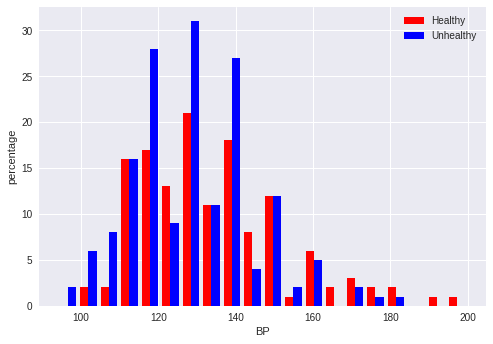

In [ ]:
plt.hist([df[df.target==0].bp, df[df.target==1].bp], bins = 20, alpha = 1, label = ["Healthy","Unhealthy"],color = ['red','blue']);
plt.xlabel("BP")
plt.ylabel("percentage")
plt.legend()
plt.show()

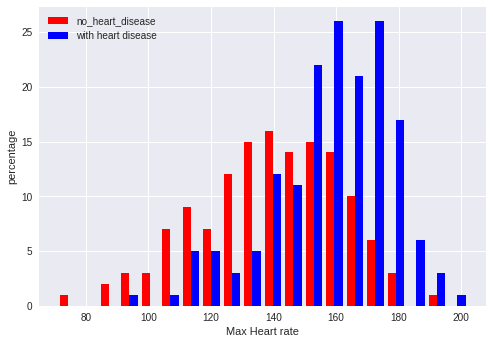

In [ ]:
plt.hist([df[df.target==0].max_heartrate, df[df.target==1].max_heartrate], bins = 20, alpha = 1, label = ["no_heart_disease","with heart disease"],color = ['red','blue']);
plt.xlabel("Max Heart rate")
plt.ylabel("percentage")
plt.legend()
plt.show()

In [ ]:
mean_table = pd.pivot_table(data=df,index=['sex','target'],aggfunc={'age':np.mean,'bp':np.mean,'cholestrol':np.mean,'max_heartrate':np.mean,'thal':np.mean})
mean_table

age          bp  cholestrol  max_heartrate      thal
sex target                                                            
0   0       59.041667  146.125000  274.958333     142.416667  2.500000
    1       54.555556  128.736111  256.750000     154.027778  2.000000
1   0       56.087719  131.929825  246.061404     138.403509  2.552632
    1       50.903226  129.741935  230.989247     161.903226  2.215054

In [ ]:
median_table = pd.pivot_table(data=df,index=['sex','target'],aggfunc={'age':np.median,'bp':np.median,'cholestrol':np.median,'max_heartrate':np.median,'thal':np.median})
median_table

age   bp  cholestrol  max_heartrate  thal
sex target                                            
0   0       60.5  140       265.5          145.5     3
    1       54.0  130       249.0          159.0     2
1   0       57.5  130       247.5          141.0     3
    1       52.0  130       228.0          163.0     2

In [ ]:
bphm_table = pd.pivot_table(data=df,index=['sex','target'],aggfunc={'bp':np.mean,'max_heartrate':np.mean})
bphm_table

bp  max_heartrate
sex target                           
0   0       146.125000     142.416667
    1       128.736111     154.027778
1   0       131.929825     138.403509
    1       129.741935     161.903226

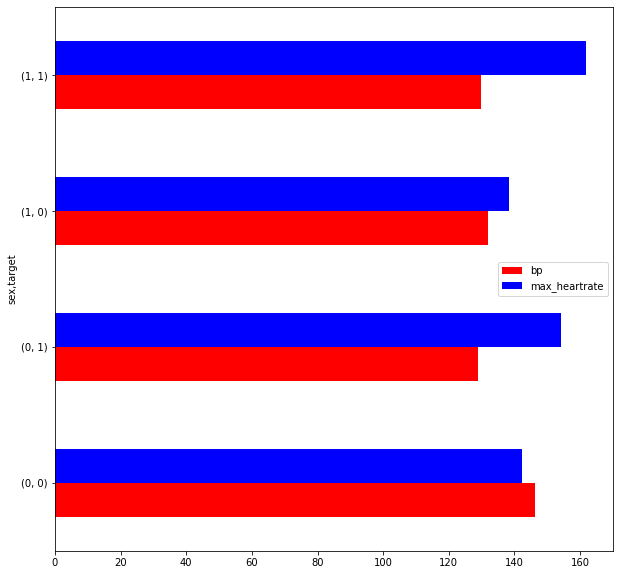

In [ ]:
bphm_table.plot(kind='barh',figsize=(10,10),color = ['red','blue']);

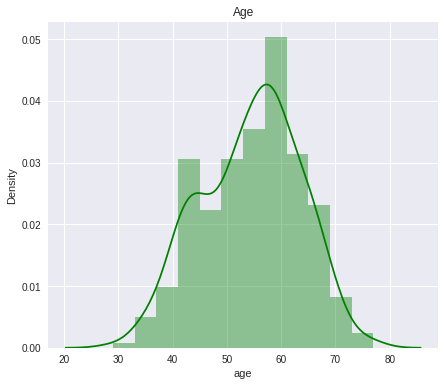

In [ ]:
plt.figure(figsize=(7,6));
sns.distplot(df.age, color= "green").set_title("Age");

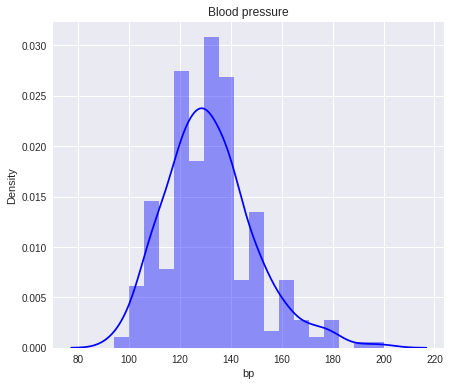

In [ ]:
plt.figure(figsize=(7,6));
sns.distplot(df.bp, color= "blue").set_title("Blood pressure");

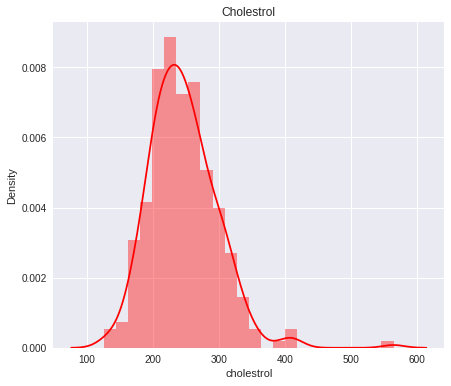

In [ ]:
plt.figure(figsize=(7,6));
sns.distplot(df.cholestrol, color= "red").set_title("Cholestrol");

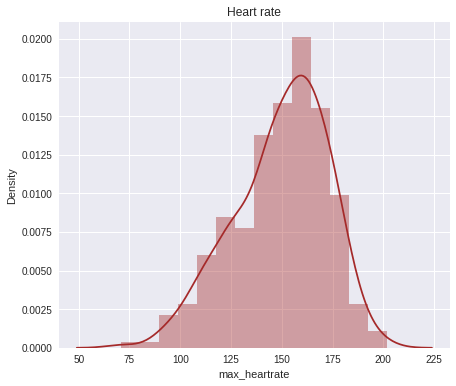

In [ ]:
plt.figure(figsize=(7,6));
sns.distplot(df.max_heartrate, color= "brown").set_title("Heart rate");

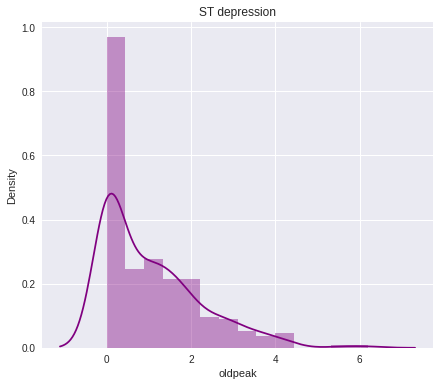

In [ ]:
plt.figure(figsize=(7,6));
sns.distplot(df.oldpeak, color= "purple").set_title("ST depression");

In [ ]:
df_sex_target= df.groupby(["sex", "target"]).size()
df_sex_target

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

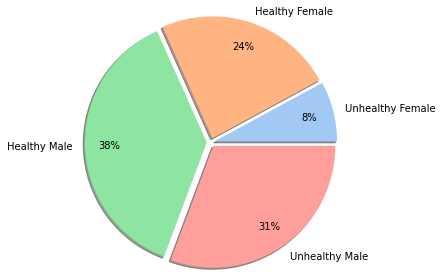

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = 'Unhealthy Female','Healthy Female', "Healthy Male", 'Unhealthy Male'
colors = sns.color_palette('pastel')[0:5]
explode = (0.05,0.05,0.05,0.05)
plt.pie(df_sex_target, labels=labels,colors = colors, autopct='%.0f%%',pctdistance=0.8, radius=1.4, explode= explode,shadow=True)
plt.show()

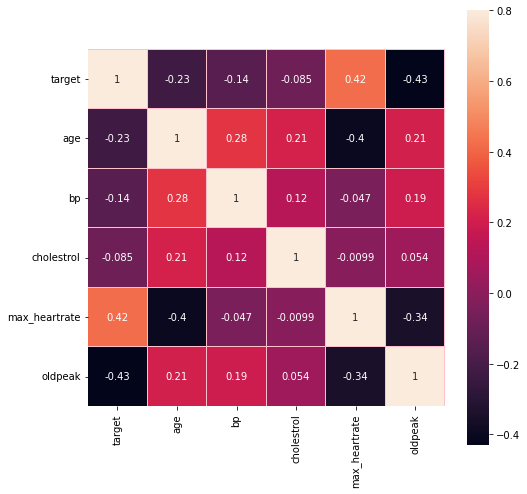

In [ ]:
numeric_variables=df[["target", "age", "bp", "cholestrol", "max_heartrate", "oldpeak"]]
corr=numeric_variables.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, linewidths=0.05,square=True,annot=True,linecolor="pink");

# **Model building**

In [ ]:
X = df.drop('target',axis='columns')
y= df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

In [ ]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
print(linmodel.score(X_test,y_test))

0.4669469761023346


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=100)
logmodel.fit(X_train,y_train)
print(logmodel.score(X_test,y_test))

0.8791208791208791


In [ ]:
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier(criterion='gini',splitter='random')
dtmodel.fit(X_train,y_train)
print(dtmodel.score(X_test,y_test))

0.6703296703296703


In [ ]:
from sklearn.svm import SVC
svmmodel=SVC(C = 1, kernel = 'linear')
svmmodel.fit(X_train,y_train)
print(svmmodel.score(X_test,y_test))

0.8901098901098901


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=10)
rfmodel.fit(X_train,y_train)
print(rfmodel.score(X_test,y_test))

0.7802197802197802


In [ ]:
from sklearn.naive_bayes import GaussianNB
gmodel = GaussianNB()
gmodel.fit(X_train,y_train)
print(gmodel.score(X_test,y_test))

0.8351648351648352


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mulmodel = MultinomialNB()
mulmodel.fit(X_train,y_train)
print(mulmodel.score(X_test,y_test))

0.7472527472527473


In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [1,10,20],
            'gamma' : ['auto'],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'decission_tree': {
        'model': tree.DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'max_iter':[100]
        }
    },
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
            'fit_intercept': [False]
        }
    }
}
scores=[]
for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })
models = pd.DataFrame(scores, columns=['model','best_score','best_params'])
models

,model,best_score,best_params
0,svm,0.839313,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}"
1,random_forest,0.820598,{'n_estimators': 5}
2,decission_tree,0.768549,{'criterion': 'entropy'}
3,logistic_regression,0.819934,{'max_iter': 100}
4,linear_regression,0.437129,{'fit_intercept': False}


In [ ]:
pred1 = svmmodel.predict(X_test)
pred2 = linmodel.predict(X_test)
pred3 = rfmodel.predict(X_test)
pred4 = dtmodel.predict(X_test)
pred5 = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
svmcm = confusion_matrix(y_test,pred1)

In [ ]:
rfcm = confusion_matrix(y_test,pred3)

In [ ]:
dtcm = confusion_matrix(y_test,pred4)

In [ ]:
logcm = confusion_matrix(y_test,pred5)

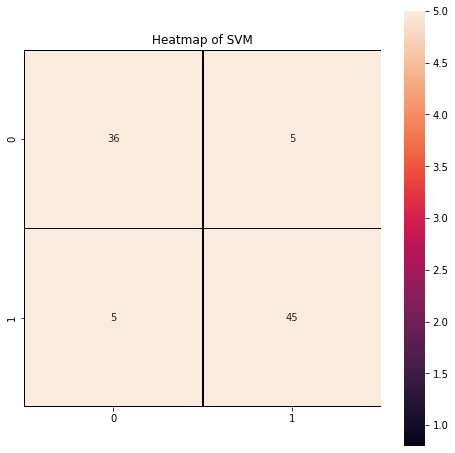

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Heatmap of SVM")
sns.heatmap(svmcm, vmax=.8, linewidths=0.5,square=True,annot=True,linecolor="black")

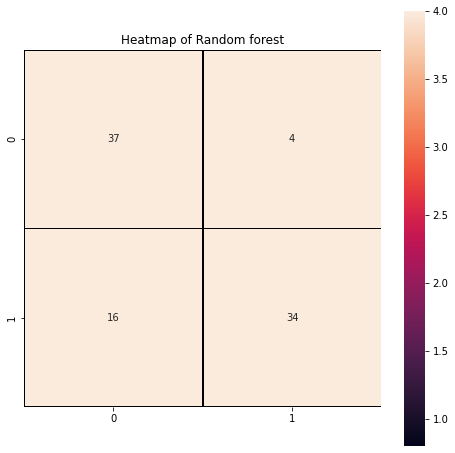

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Heatmap of Random forest")
sns.heatmap(rfcm, vmax=.8, linewidths=0.5,square=True,annot=True,linecolor="black")

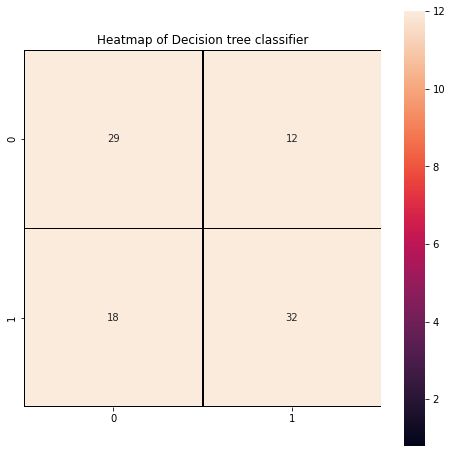

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Heatmap of Decision tree classifier")
sns.heatmap(dtcm, vmax=.8, linewidths=0.5,square=True,annot=True,linecolor="black")

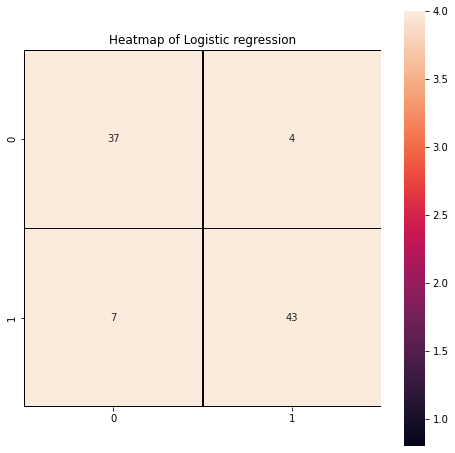

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Heatmap of Logistic regression")
sns.heatmap(logcm, vmax=.8, linewidths=0.5,square=True,annot=True,linecolor="black")

In [ ]:
matrix = classification_report(y_test,pred1,labels=[1,0])
print('Classification report of SVM : \n',matrix)

Classification report of SVM : 
               precision    recall  f1-score   support

           1       0.90      0.90      0.90        50
           0       0.88      0.88      0.88        41

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



In [ ]:
matrix = classification_report(y_test,pred3,labels=[1,0])
print('Classification report of Random forest model : \n',matrix)

Classification report of Random forest model : 
               precision    recall  f1-score   support

           1       0.89      0.68      0.77        50
           0       0.70      0.90      0.79        41

    accuracy                           0.78        91
   macro avg       0.80      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91



In [ ]:
matrix = classification_report(y_test,pred4,labels=[1,0])
print('Classification report of Decision tree classifier model : \n',matrix)

Classification report of Decision tree classifier model : 
               precision    recall  f1-score   support

           1       0.73      0.64      0.68        50
           0       0.62      0.71      0.66        41

    accuracy                           0.67        91
   macro avg       0.67      0.67      0.67        91
weighted avg       0.68      0.67      0.67        91



In [ ]:
matrix = classification_report(y_test,pred5,labels=[1,0])
print('Classification report of Logistic regression : \n',matrix)

Classification report of Logistic regression : 
               precision    recall  f1-score   support

           1       0.91      0.86      0.89        50
           0       0.84      0.90      0.87        41

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [ ]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred1[:], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred2[:], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred3[:], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred4[:], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred5[:], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred1[:])
auc_score2 = roc_auc_score(y_test, pred2[:])
auc_score3 = roc_auc_score(y_test, pred3[:])
auc_score4 = roc_auc_score(y_test, pred4[:])
auc_score5 = roc_auc_score(y_test, pred5[:])

print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5)

0.8890243902439025 0.9195121951219513 0.7912195121951221 0.6736585365853658 0.881219512195122


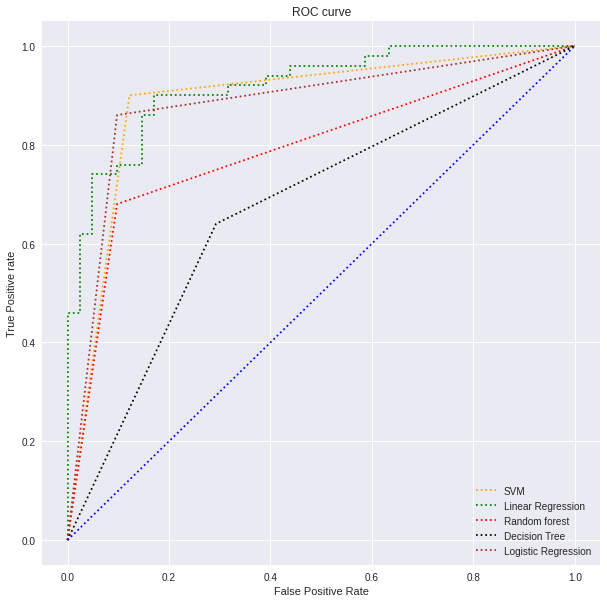

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='dotted',color='orange', label='SVM')
plt.plot(fpr2, tpr2, linestyle='dotted',color='green', label='Linear Regression')
plt.plot(fpr3, tpr3, linestyle='dotted',color='red', label='Random forest')
plt.plot(fpr4, tpr4, linestyle='dotted',color='black', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='dotted',color='brown', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='dotted', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
def datainput():
  data=[]
  print('Enter age :')
  age=int(input())
  data.append(age)
  print('Enter sex :\n O if Female\n 1 if Male')
  sex=int(input())
  data.append(sex)
  print('Enter Chestpain :\n 0 : typical angina\n 1 : atypical angina\n 2 : non-anginal pain\n 3 : asymptomatic')
  cp = int(input())
  data.append(cp)
  print('Enter BP : only systolic')
  bp = int(input())
  data.append(bp)
  print('Enter cholesterol excluding decimal value : ')
  chol = int(input())
  data.append(chol)
  print('Enter diabetic status :\n 1 = true\n 0 = false')
  diab = int(input())
  data.append(diab)
  print('Enter ecg measurement :\n 0 = normal\n1 = having ST-T wave abnormality\n2 = showing probable\n3 = definite left ventricular hypertrophy by Estes_criteria')
  ecg = int(input())
  data.append(ecg)
  print('Enter max heart :')
  hr = int(input())
  data.append(hr)
  print('Enter Angnia :\n 1 = yes\n 0 = no')
  ang = int(input())
  data.append(ang)
  print('Enter Oldpeak :')
  op = float(input())
  data.append(op)
  print('Enter Slope :\n 1 =  upsloping\n2 = flat\n3 = downsloping')
  slope = int(input())
  data.append(slope)
  print('Enter ca  : range(0-3)')
  ca = int(input())
  data.append(ca)
  print('Enter Thalassemia :\n 0 =  None\n 1 = Undercontrol\n 2 = fixed defect\n 3 = Reversible defect')
  thal = int(input())
  data.append(thal)
  prediction=svmmodel.predict([data])
  print(data)
  if prediction==1:
    print('Possible risk of Cardiac arrest')
  else:
    print('Healthy')